In [14]:
%%HTML
<h1>1. Abstract</h1>
<h3>
<p>In this report, we'll be exploring a dataset consisting of app interaction data from a popular online food delivery platform and using it to answer some business questions.</p>
</h3>

In [15]:
import sys
import time
import warnings
import pylab as P
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division

In [32]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
cols = ["id", "platform", "timestamp", "event_type"]
sv_cols = ["id", "platform", "timestamp", "event_type", "screenname"]
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

In [5]:
#reading in all of the event data
data = pd.read_csv("/data.csv")[cols].sort_values(by = ['id', 'timestamp'])

#reading in all of 'Screen Visited' events' data
svdata = pd.read_csv("/svdata.csv")[sv_cols].sort_values(by = ['id', 'timestamp'])
svdata = svdata.loc[svdata['screenname'].notnull()]

In [8]:
#Lets first see what our data looks like.
print data.head()
print "\n"
print svdata.head()

         id platform      timestamp      event_type
16218     6  Android 20161001073000    App Launched
1348891   6  Android 20161001073000          Splash
958609    6  Android 20161001073100  Screen Visited
16249     6  Android 20161001073500    App Launched
16256     6  Android 20161001073500    App Launched


        id platform      timestamp      event_type       screenname
55849    6  Android 20161001073100  Screen Visited  Select location
53074   33  Android 20161001171700  Screen Visited     Menu catalog
163871  36  Android 20161002123700  Screen Visited             Cart
163872  36  Android 20161002123700  Screen Visited     Menu catalog
356218  54  Android 20161003150100  Screen Visited     Menu catalog


In [5]:
%%HTML
<h3>
<p>Where do all these app interaction events come from? Lets find out. From the plot below we can see that most of the app interaction events are triggered on the android application of our e-commerce portal.</p> 
</h3>

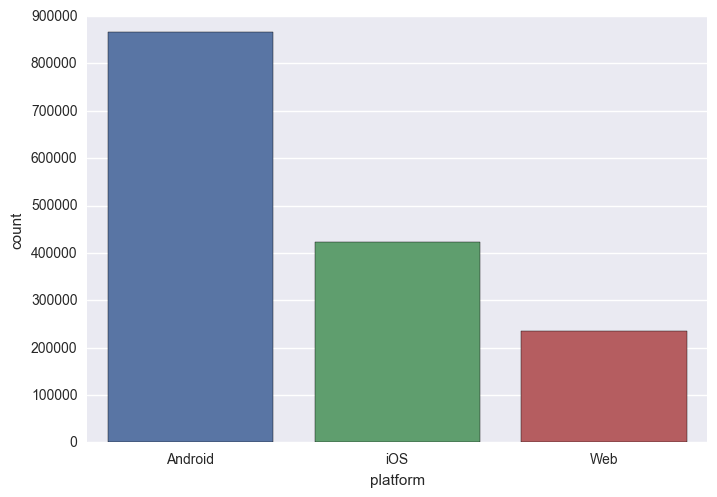

In [7]:
plot = ''
plot = sns.countplot(x="platform", data=data)
sns.plt.show()

In [53]:
#Number of unique users who logged in on each platform.
print dict(data[["id", "platform"]].drop_duplicates().groupby(by=['platform']).size())

#Number of unique users who made a transaction on each platform.
print dict(data.loc[data.event_type=="Charged"][["id", "platform"]].drop_duplicates().groupby(by=['platform']).size())

{'Web': 53196, 'Android': 30884, 'iOS': 11433}
{'Web': 4940, 'Android': 4001, 'iOS': 2487}


In [16]:
%%HTML
<h3>
<p>Where are all the unique users coming from and how many of them actually make a purchase on our website? We noticed from the data that for a time period of two days (from 10-01-2016 to 10-03-2016), the vast majority of unique users (53,196) accessed the app on Web. Of these users, 4940 users had placed orders and were charged. The second most popular platform is Android, with a unique active user count of 30,884, of which 4001 users were charged for their orders.</p>
</h3>

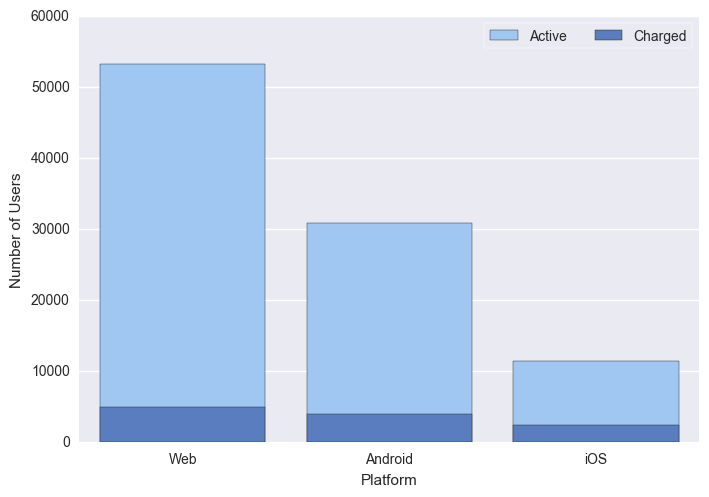

In [52]:
from collections import OrderedDict
active = data[["id", "platform"]].drop_duplicates().groupby(by=['platform']).size()
charged = data.loc[data.event_type=="Charged"][["id", "platform"]].drop_duplicates().groupby(by=['platform']).size()
sales = OrderedDict([ ('Platform', ['Android', 'iOS', 'Web']), ('Charged', [4001, 2487, 4940]), ('Active',  [30884, 11433, 53196])])
df = pd.DataFrame.from_dict(sales).sort_values(by = ['Active', 'Charged'], ascending = [False, False])
sns.set_color_codes("pastel")
ax = ''
ax = sns.barplot(x="Platform", y="Active", data=df, label="Active", color="b")
sns.set_color_codes("muted")
ax = sns.barplot(x="Platform", y="Charged", data=df, label="Charged", color="b")
ax.set(xlabel='Platform', ylabel='Number of Users')
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
sns.plt.show()

In [10]:
%%HTML
<h3>
<p>There are over 60 different types of events that can be tracked through the app. Which ones occur most frequently? We see that “Screen Visited” seems to be the most frequently occurring event on our app, followed by the event “Menu Category Changed”. We can also observe that over the course of two days less than 15000 transactions have occurred (the event “Charged” has a frequency of 14,417).</p>
</h3>

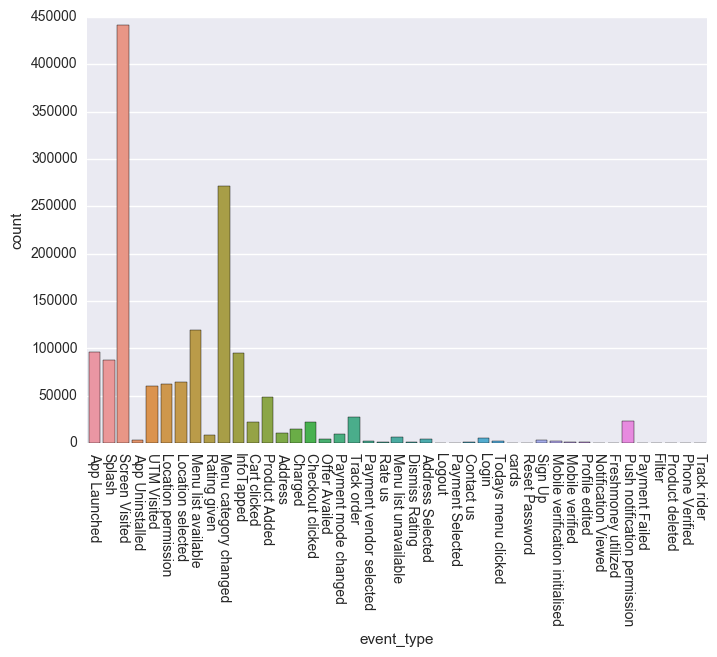

In [15]:
plot = ''
plot = sns.countplot(x="event_type", data=data)
plot.set_xticklabels(plot.get_xticklabels(), rotation=-90)
sns.plt.show()

In [16]:
categories = ['american', 'asian', 'chinese', 'continental', 'european', 'fusion', 
              'indian', 'italian', 'latin-american', 'mediterranean', 'mexican', 
              'middle-east', 'oriental', 'pan-asian', 'thai', 'universal']

for category in categories:    
    svdata.loc[svdata.screenname.str.startswith('/'+category), 'category'] = category    

In [19]:
svdata.head()

,id,platform,timestamp,event_type,screenname,category
55849,6,Android,20161001073100,Screen Visited,Select location,NaN
53074,33,Android,20161001171700,Screen Visited,Menu catalog,NaN
163871,36,Android,20161002123700,Screen Visited,Cart,NaN
163872,36,Android,20161002123700,Screen Visited,Menu catalog,NaN
356218,54,Android,20161003150100,Screen Visited,Menu catalog,NaN


In [33]:
category_df = svdata.loc[svdata.category.notnull()]
category_df.loc[:, 'isveg'] = np.where(category_df['screenname'].str.contains('vegetarian'), 'Veg', 'Nonveg')

In [22]:
category_df.head()

,id,platform,timestamp,event_type,screenname,category,isveg
273657,147790,Web,20161002220200,Screen Visited,/chinese--non-veg--add-ons--chicken--oys,chinese,Nonveg
283821,147810,Web,20161002233300,Screen Visited,/pan-asian--vegetarian--add-ons--bell-pe,pan-asian,Veg
283827,147810,Web,20161002233300,Screen Visited,/italian--vegetarian--mains--fusilli-pas,italian,Veg
283834,147810,Web,20161002233300,Screen Visited,/universal--vegetarian--jars--caramel--b,universal,Veg
286666,147810,Web,20161003020400,Screen Visited,/mexican--vegetarian--starter-appetizers,mexican,Veg


In [17]:
%%HTML
<h3>
<p>Users often browse through food from different cuisines before making a final choice on what to purchase. Lets find out which cuisines are getting the most screen views. Over here, we observe that Continental with a count of 5620, is the food category with the highest number of user views. Latin-American dishes were the least popular (with a view count of only 1).<p>
</h3>

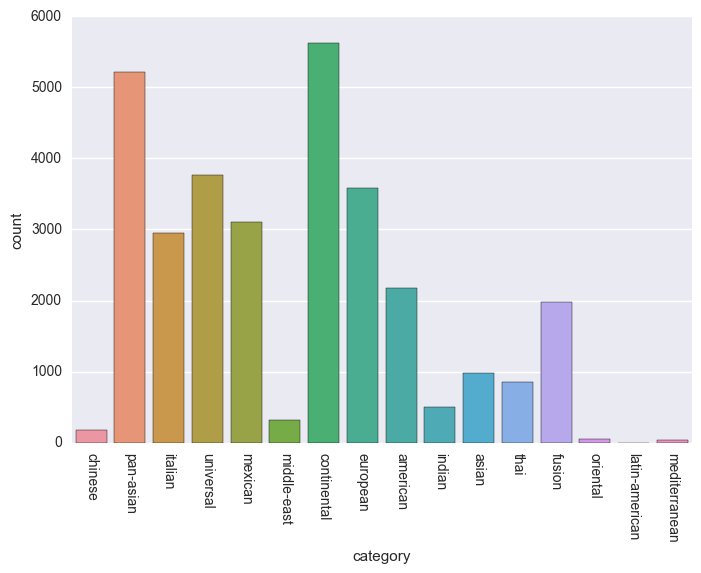

In [30]:
plot = ''
plot = sns.countplot(x="category", data=category_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=-90)
sns.plt.show()

In [12]:
%%HTML
<h3>
<p>What is the ratio of vegetarian food views to non vegetarian food views withing each cuisine? The plot below shows us that Pan-Asian seems to be the most popular choice among people who’re interested in vegetarian food. And for non vegetarians, the most popular is Continental.</p>
</h3>

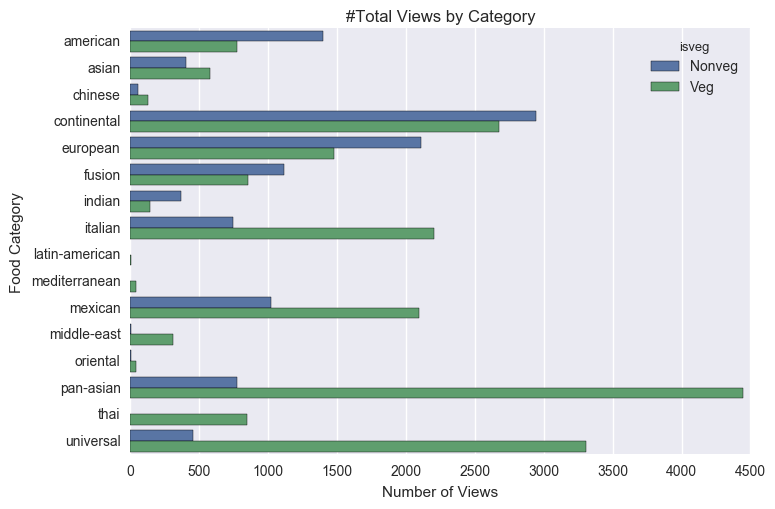

In [36]:
plot = ''
category_count = category_df[["id", "category", "isveg"]].groupby(by = ['category', 'isveg']).count().reset_index().sort_values(by = ['category', 'id'], ascending=[True, False])
plot = sns.barplot(x = "id", y = "category", data = category_count, hue = "isveg")
plot.set(xlabel='Number of Views', ylabel='Food Category')
plt.title("#Total Views by Category")
sns.plt.show()

In [58]:
def getplot(category):
    ax0=''
    category = category
    product_df = category_df[["id", "screenname", "category", "isveg"]].groupby(by = ['screenname', 'category', 'isveg']).count().sort_values(by = ['id'], ascending=False).reset_index()
    ax0 = sns.barplot(x = "id", y = "screenname", data = product_df.loc[product_df.category==category])
    ax0.set(xlabel='Number of Views', ylabel=category)
    return(ax0)

In [13]:
%%HTML
<h3>
<p>In terms of screen views, which dishes are more popular for a given cuisine? Over here we drill down to the product level for two of the most popular categories, continental and pan-asian. We can observe that number of continental food items that are viewed far exceed that of pan-asian food items.</p>
</h3>

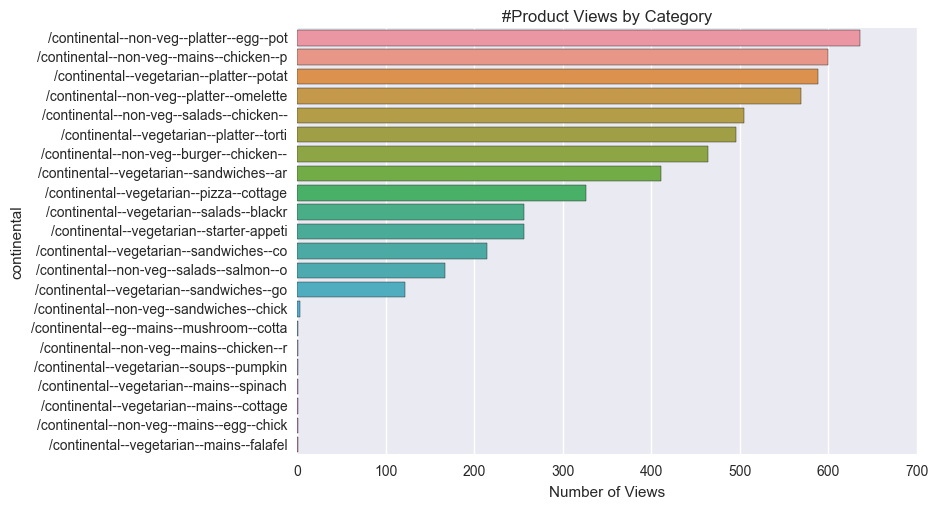

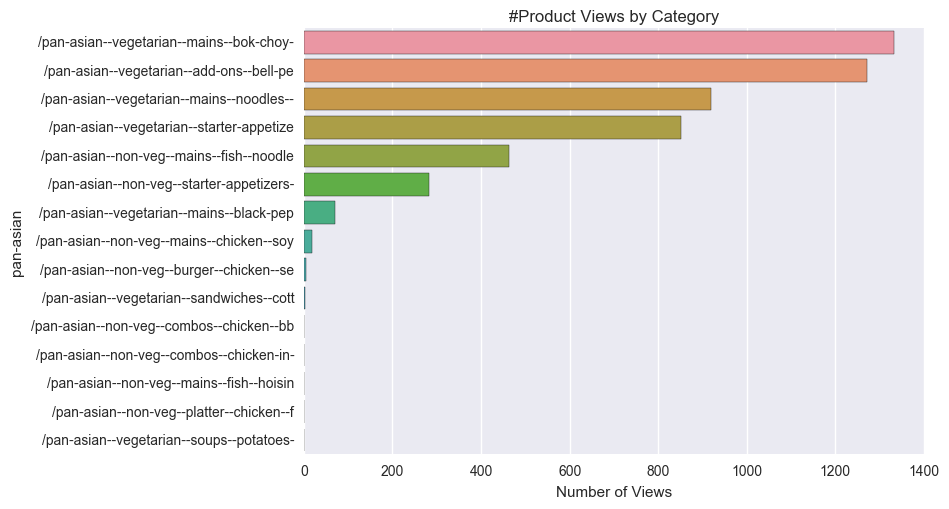

In [60]:
getplot('continental')
plt.title("#Product Views by Category")
sns.plt.show()
print "\n"
getplot('pan-asian')
plt.title("#Product Views by Category")
sns.plt.show()